<a href="https://colab.research.google.com/github/Actulus/IntelligensModszerekTantargy/blob/main/LegkozelebbiSzomszed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import math
import time
from sklearn.metrics import accuracy_score

from google.colab import widgets
from typing import Callable, Tuple

**Adatok betöltése**

In [14]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [15]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**1. feladat: adatok megjelenítése**

A különböző osztálybeli példányokat különböző színekkel fogjuk megjeleníteni.

(a) Jelenítse meg az osztálycímkék különböző értékeit!

In [16]:
print(data['class'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


(b) Írjon egy függvényt, amely a stringként megadott osztálycímkéhez színek elnevezését rendeli hozzá az alábbiak szerint:
<table>
<tr><td><b>Függvény argumentuma</b></td><td><b>Elvárt kimenet</b></td></tr>
<tr><td>Iris-setosa</td><td>red</td></tr>
<tr><td>Iris-virginica</td><td>blue</td></tr>
<tr><td>Iris-versicolor</td><td>yellow</td></tr>
</table>

In [17]:
def get_color(class_label):
  if class_label == 'Iris-setosa':
    return 'red'
  elif class_label == 'Iris-virginica':
    return 'blue'
  elif class_label == 'Iris-versicolor':
    return 'yellow'
  else:
    return 'black' # or raise an exception for unknown class labels

(c) Hozzon létre egy listát **colors** néven, amelynek annyi eleme van, ahány példány található az adatbázisban, és a lista i-dik eleme az i-dik példány színének felel meg.

In [18]:
colors = [get_color(class_label) for class_label in data['class']]

A következő kóddal megjelenítjük az adatokat. A megjelenítés során előfordulhat, hogy a megjelenített pontok elfedik egymást, és ezért nem látszik, hogy egy adott pontban valójában hány adatpéldány található. Ezért minimális zajt adunk az adatainkhoz a megjelenítéshez (jitter).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

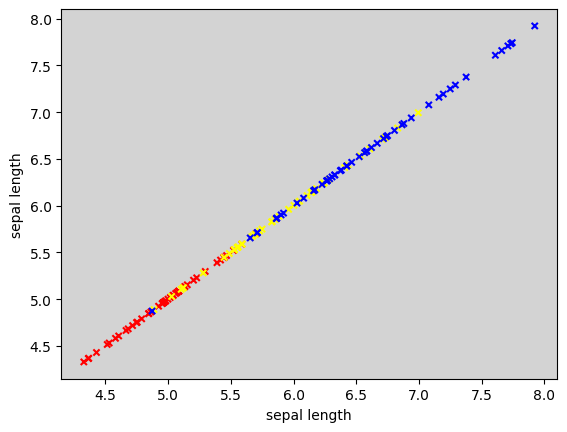

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

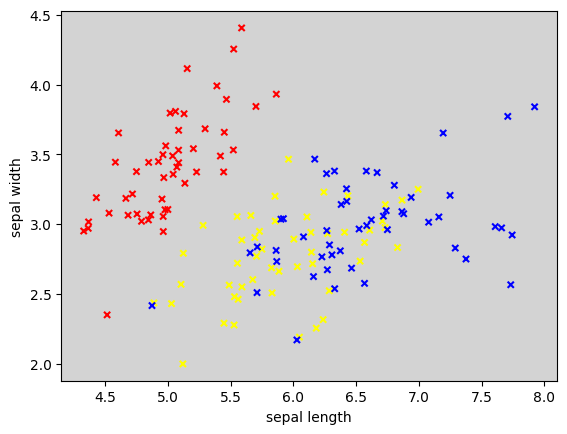

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

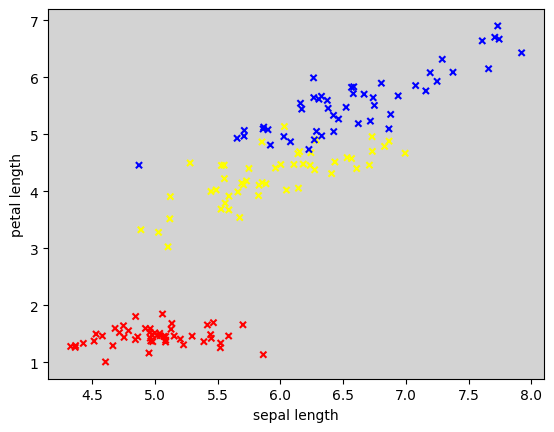

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

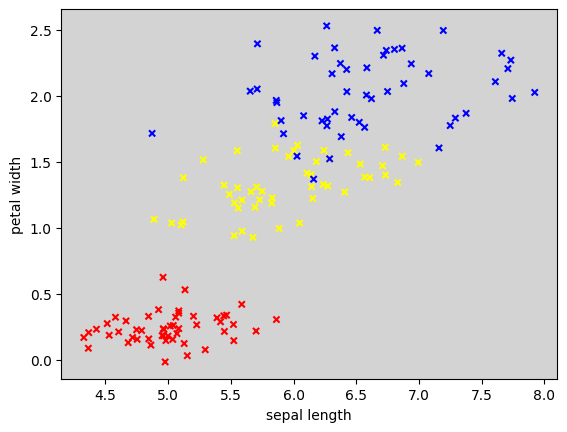

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

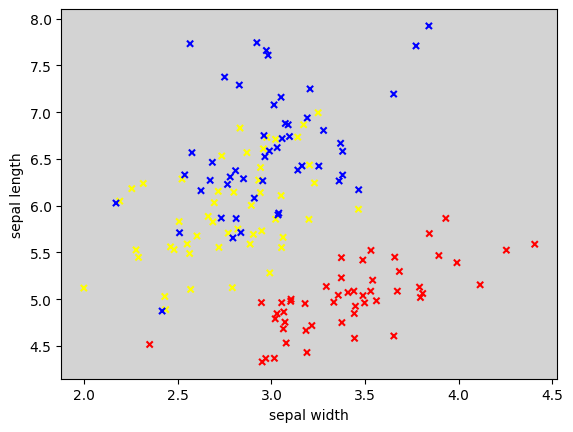

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

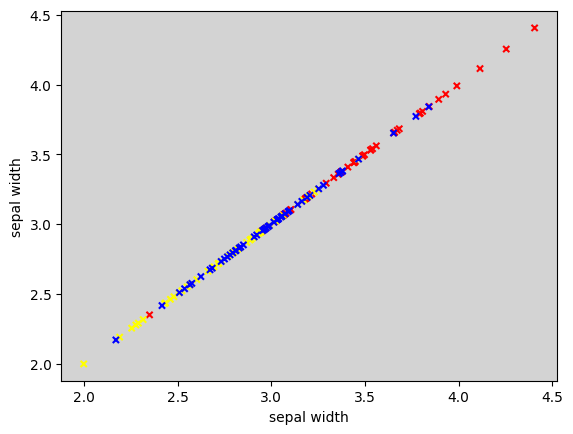

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

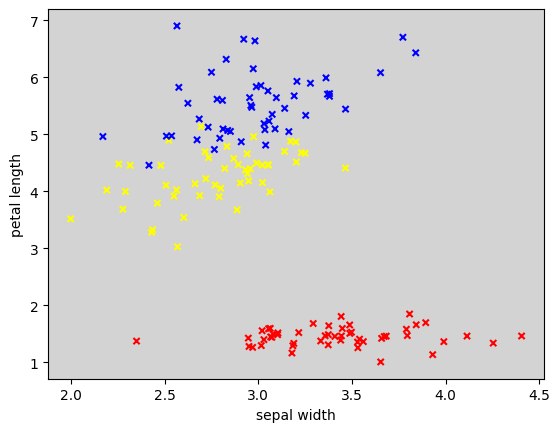

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

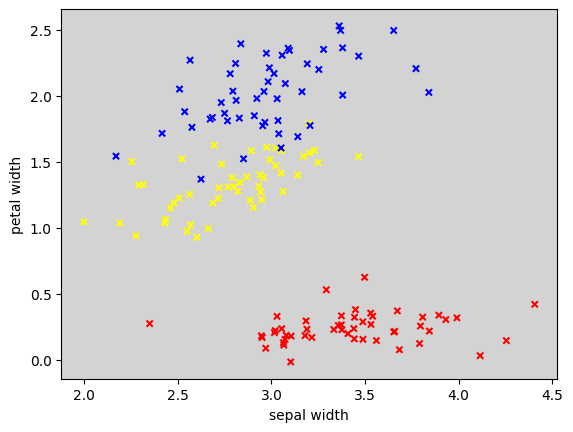

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

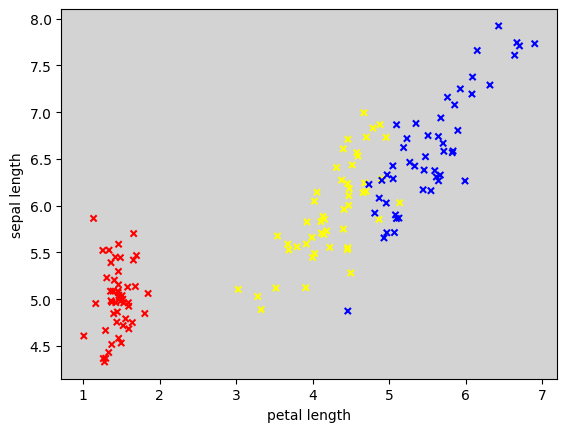

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

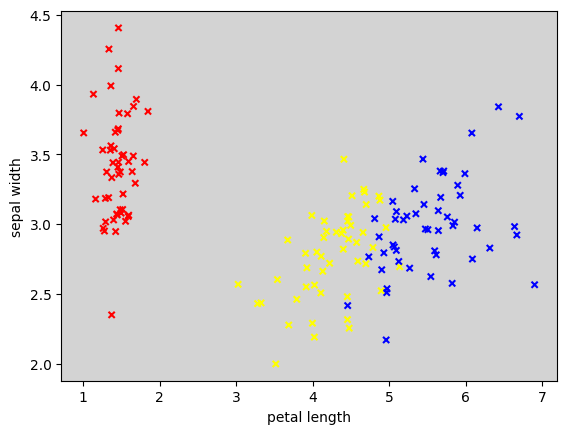

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

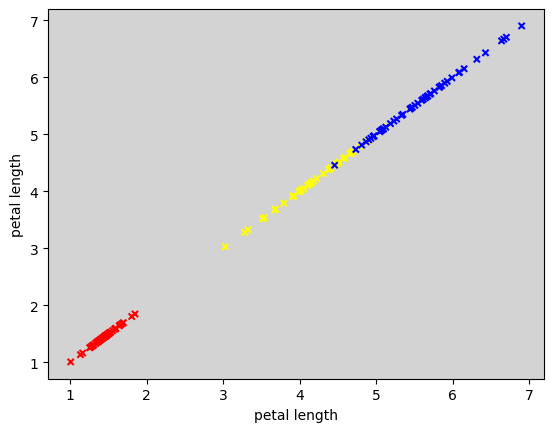

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

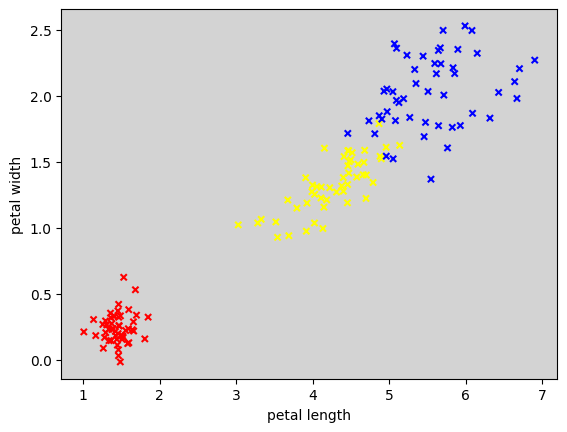

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

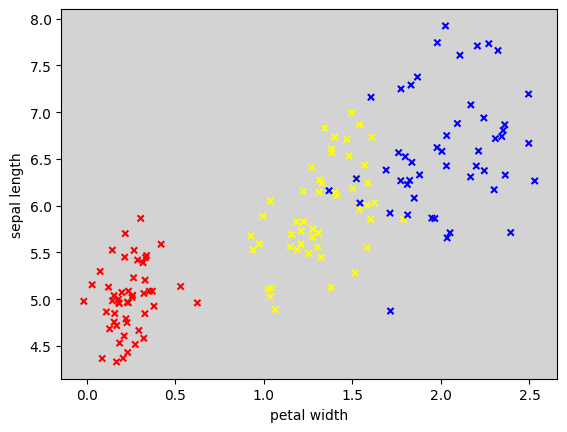

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

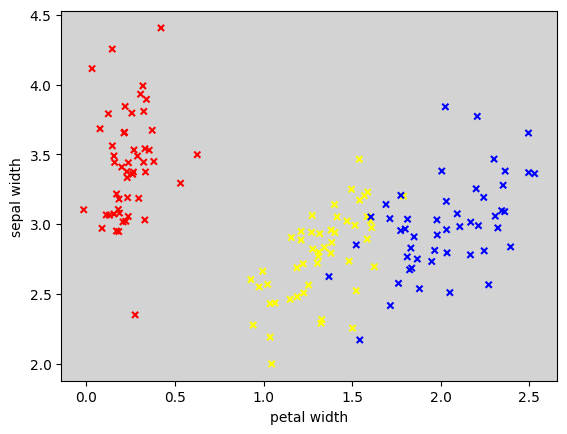

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

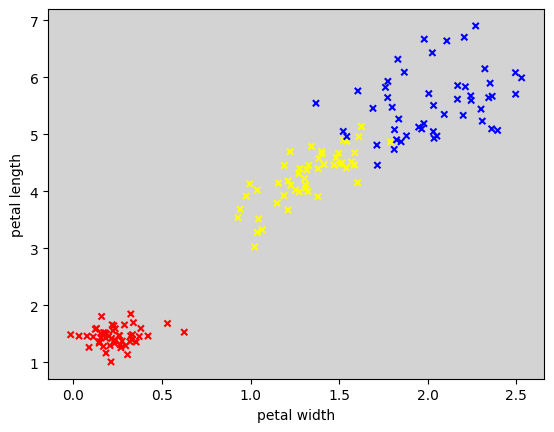

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

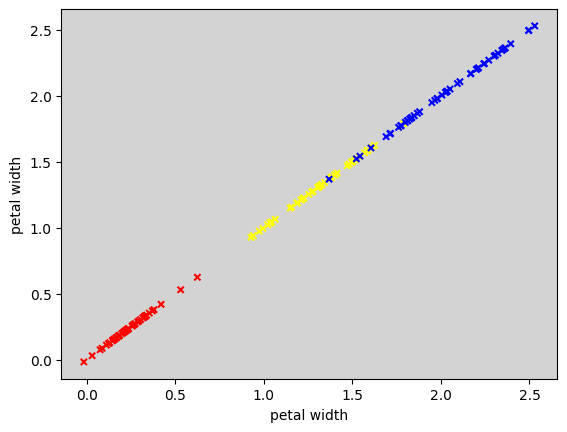

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
attributes = ['sepal length', 'sepal width', 'petal length', 'petal width']
attributes_short = ['sl','sw','pl','pw']
tb = widgets.TabBar(attributes, location='top')

# jitter
data_to_plot = data.copy(True)
for col in attributes:
  data_to_plot[col] = data_to_plot[col]+np.random.normal(0,0.05,len(data))

for i in range(4):
  with tb.output_to(i):
    inner_tb = widgets.TabBar(attributes_short, location='start')
    for j in range(4):
      with inner_tb.output_to(j):
        p = data_to_plot.plot.scatter(attributes[i], attributes[j],
                                      c = colors, marker='x')
        p.set_facecolor('lightgrey')

Összehasonlításként megjelenítjük az adatokat jitter nélkül is:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

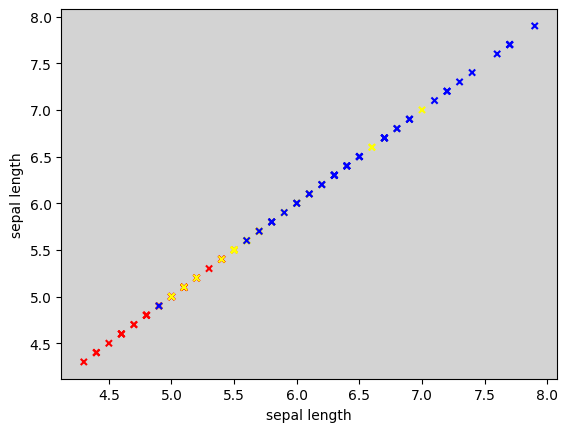

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

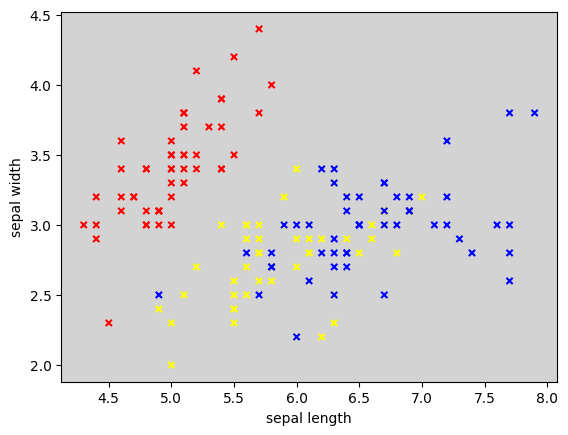

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

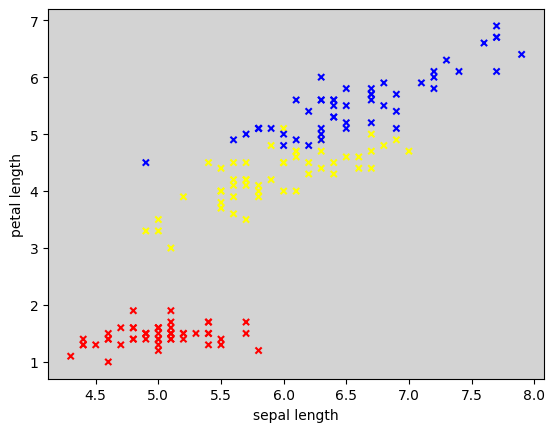

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

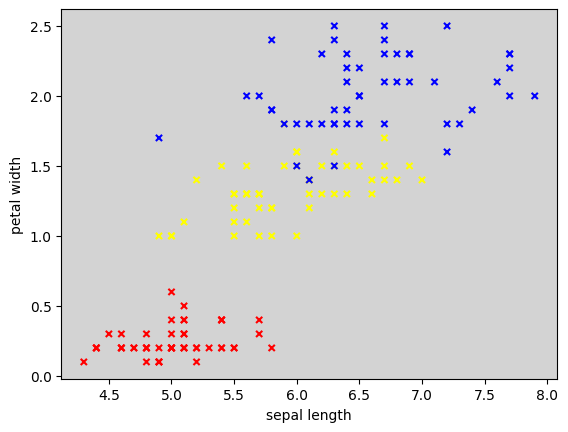

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

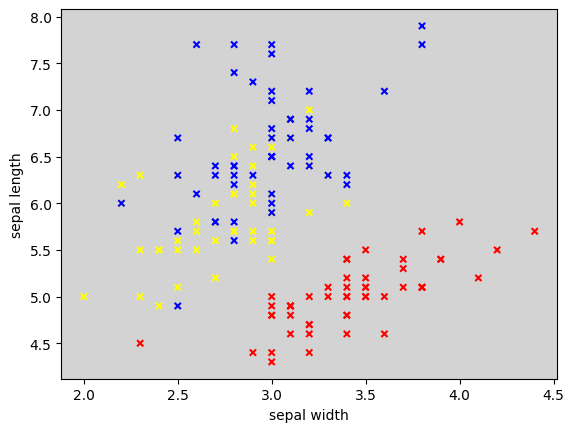

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

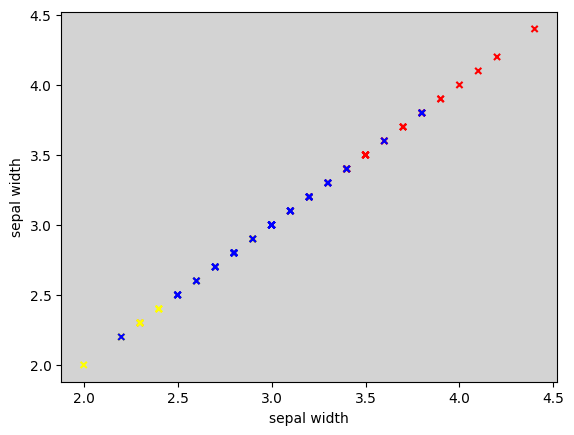

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

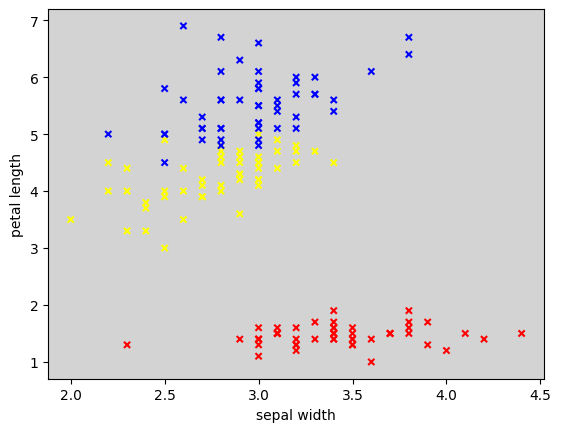

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

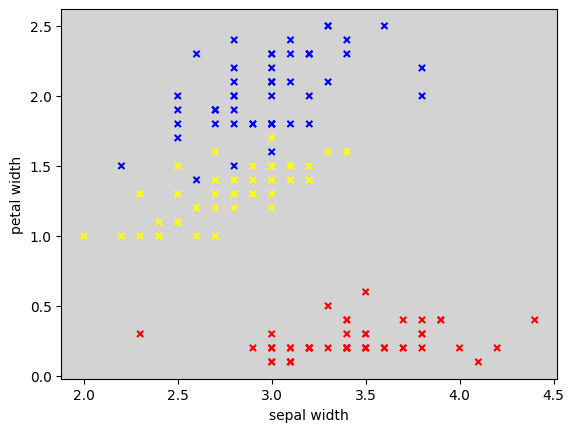

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

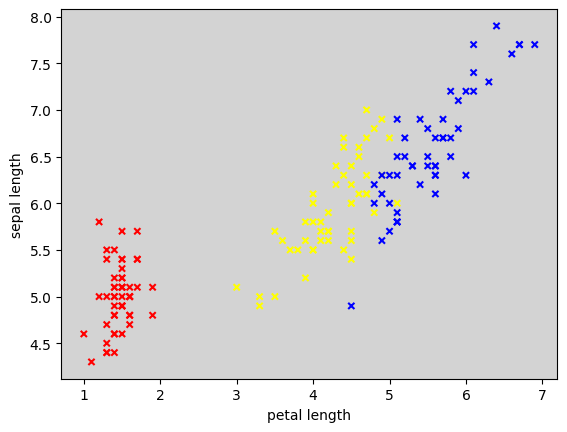

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

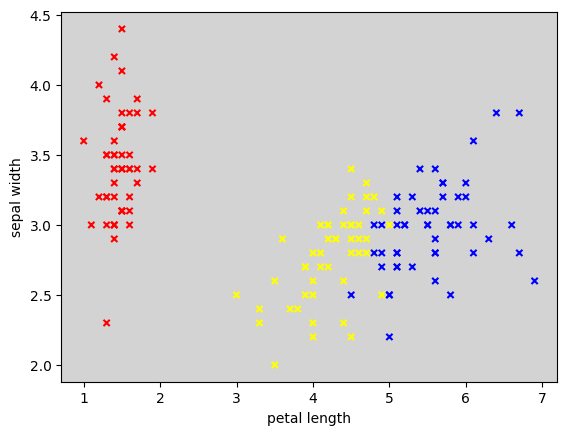

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

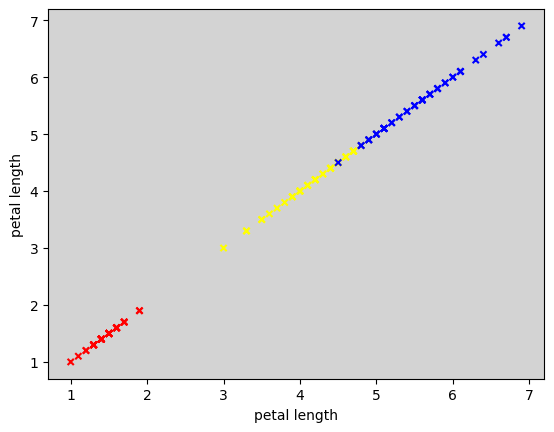

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

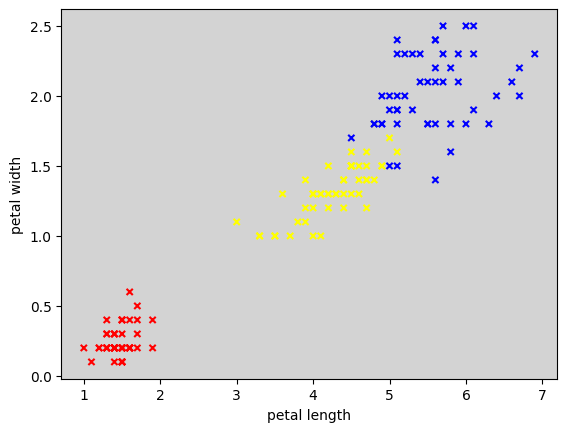

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

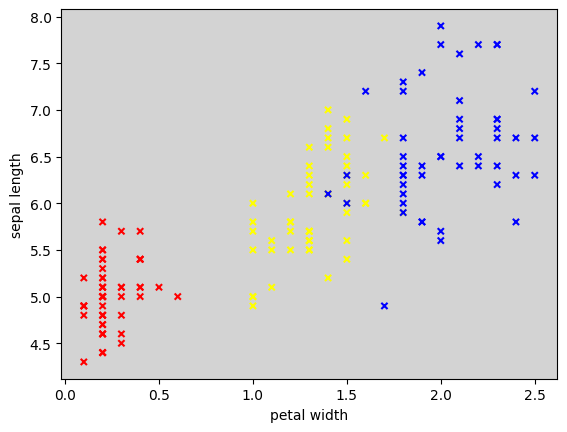

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

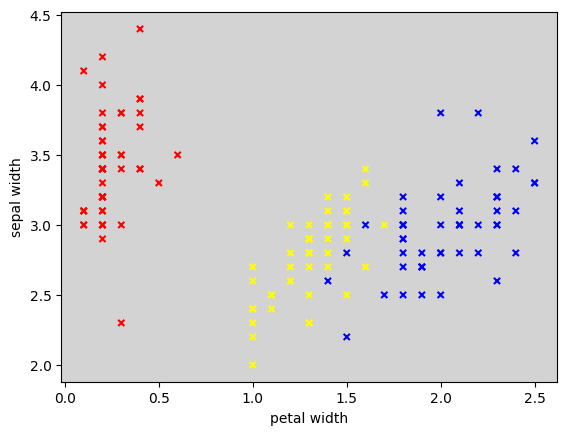

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

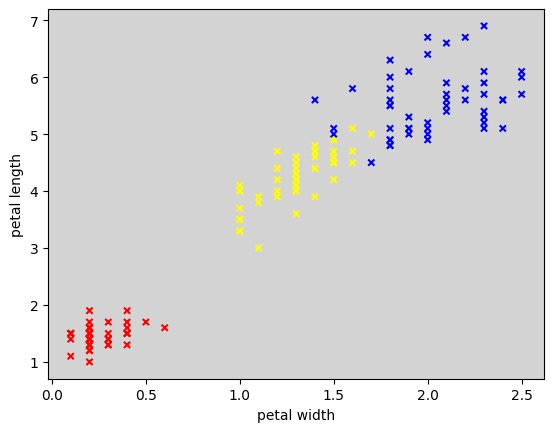

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

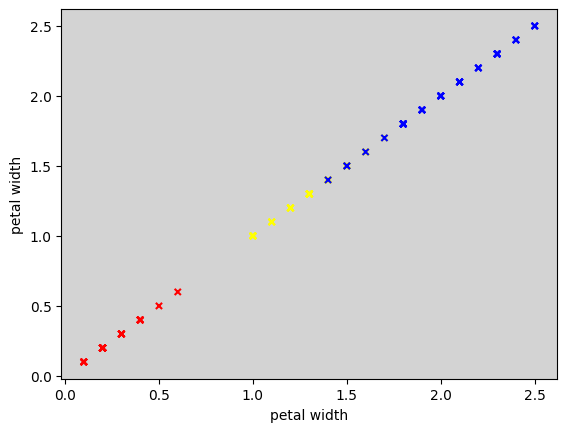

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
attributes = ['sepal length', 'sepal width', 'petal length', 'petal width']
attributes_short = ['sl','sw','pl','pw']
tb = widgets.TabBar(attributes, location='top')
for i in range(4):
  with tb.output_to(i):
    inner_tb = widgets.TabBar(attributes_short, location='start')
    for j in range(4):
      with inner_tb.output_to(j):
        p = data.plot.scatter(attributes[i], attributes[j],
                              c = colors, marker='x')
        p.set_facecolor('lightgrey')

**2. feladat**

Milyen különbségeket lát a jitterrel és anélkül történő megjelnítés között? Melyik ábrázolás vezethet téves következtetésekre és mikor?

Adatok konvertálása np.array-be:

In [21]:
data_array = np.zeros( (len(data), 4 ))
data_array[:,0] = data['sepal length']
data_array[:,1] = data['sepal width']
data_array[:,2] = data['petal length']
data_array[:,3] = data['petal width']

**3. feladat: osztálycímkék előkészítése**

(a) Implementáljon egy függvényt, amely számokat rendel az egyes osztálycímkékhez a következőképpen:

<table>
<tr><td><b>Függvény argumentuma</b></td><td><b>Elvárt kimenet</b></td></tr>
<tr><td>Iris-setosa</td><td>0</td></tr>
<tr><td>Iris-virginica</td><td>1</td></tr>
<tr><td>Iris-versicolor</td><td>2</td></tr>
</table>

In [23]:
def get_code(class_label):
  if class_label == 'Iris-setosa':
    return 0
  elif class_label == 'Iris-virginica':
    return 1
  elif class_label == 'Iris-versicolor':
    return 2
  else:
    return -1 # or raise an exception for unknown class labels

(b) Hozzon létre egy numpy array-t **labels** néven, amely az egyes példányok osztálycímkéit tartalmazza számként!

In [26]:
labels = np.array([get_code(class_label) for class_label in data['class']])

**4. feladat: adatok felosztása tanító adatokra és tesztadatokra**

(a) Hozzon létre két numpy array-t **train_indices** és **test_indices** néven, amelyek a tanítópéldányok és tesztpéldányok sorszámait (indexeit) tartalmazza. Páros sorszámú példányok legyen a tanítópéldányok, a páratlan sorszámúak pedig a tesztpéldányok!

In [27]:
train_indices = np.array([i for i in range(len(data)) if i%2==0])
test_indices = np.array([i for i in range(len(data)) if i%2!=0])

(b) Ossza fel az adatokat és címkéket az előbbiekben létrehozott indexek használatával!

In [28]:
train_data = data_array[train_indices]
train_labels = labels[train_indices]
test_data = data_array[test_indices]
test_labels = labels[test_indices]

**5. feladat: hasonlósági függvények**

Írjon egy függvényt, amely kiszámolja két példány

(a) euklidészi távolságát,

In [29]:
euclidean_distance = lambda x, y: np.sqrt(np.sum((x-y)**2))

In [30]:
# Test 1
euclidean_distance( np.array([1,1,1]), np.array([2,2,2])) == math.sqrt(3)

np.True_

In [31]:
# Test 2
euclidean_distance( np.array([1,2]), np.array([5,5])) == 5

np.True_

(b) Manhattan-távolságát,

In [32]:
manhattan_distance = lambda x, y: np.sum(np.abs(x-y))

In [33]:
# Test 1
manhattan_distance( np.array([1,1,1]), np.array([2,2,2])) == 3

np.True_

In [34]:
# Test 2
manhattan_distance( np.array([1,2]), np.array([5,5])) == 7

np.True_

(c) koszinusz távolságát!

In [35]:
cosine_distance = lambda x, y: np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

In [36]:
# Test 1
abs( cosine_distance(np.array([1,1]), np.array([2,2])) ) < 0.0001

np.False_

In [37]:
# Test
abs( cosine_distance(np.array([-1,1]), np.array([2,2])) - 1 ) < 0.0001

np.False_

**6. feladat**

(a) Írjon egy függvényt, amely meghatározza egy példány euklideszi távolság szerinti legközelebbi szomszédját! A függvény eredménye legyen a legközelebbi szomszéd sorszáma (indexe) és annak távolsága!

(b) Fejlessze tovább az előző függvényt olyan módon, hogy tetszőleg távolságfüggvény mellett képes legyen a legközelebbi szomszéd meghatározására. A távolságfüggvény legyen egy további argumentum. Az (a) pontban elkészített megoldással való kompatibilitás miatt figyeljen arra, hogy amennyiben a kód használója nem ad meg távolságot, akkor az euklideszi távolság mellett történjen a legközelebbi szomszéd meghatározása!

In [45]:
def get_nearest_neighbor(x: np.array, data: np.array,
                         distance_func: Callable[[np.array, np.array], float] = euclidean_distance) -> Tuple[int, float]:
  """
  Legközelebbi szomszéd megkeresése

  Bemenet:
  --------
    x : np.array
      Azon példány, amelynek a legközelebbi szomszédját keressük
    data : np.array
      Az adattábla, amiben keressük x legközelebbi szomszédját

  Kimenet:
    nearest_neighbor_index : int
      a legközelebbi szomszéd sorszáma (data hányadik példánya az x
      legközelebbi szomszédja)
    distance_to_nearest_neighbor : float
      x távolsága a legközelebbi szomszédjától
  """

  nearest_neighbor_index = 0
  distance_to_nearest_neighbor = euclidean_distance(x, data[0])

  for i in range(1, len(data)):
      distance = euclidean_distance(x, data[i])
      if distance < distance_to_nearest_neighbor:
          nearest_neighbor_index = i
          distance_to_nearest_neighbor = distance


  return nearest_neighbor_index, distance_to_nearest_neighbor

In [46]:
# Test
get_nearest_neighbor(test_data[0], train_data) == (6, 0.1414213562373099)

True

In [47]:
# Test
get_nearest_neighbor(test_data[0], train_data, euclidean_distance) == (6, 0.1414213562373099)

True

**7. feladat**

(a) Az előző feladatban elkészített függvényt felhasználva írjon egy olyan függvényt, amely megadja, hogy milyen osztálycímkét prediktál a legközelebbi szomszéd osztályozó egy (teszt) példányra!

In [48]:
def nearest_neighbor_prediction_for_an_instance(test_instance: np.array,
  train_data: np.array, train_labels: np.array, distance) -> int:

  nearest_neighbor_index, _ = get_nearest_neighbor(test_instance, train_data, distance)
  return train_labels[nearest_neighbor_index]

In [49]:
# Test
nearest_neighbor_prediction_for_an_instance(
    test_data[0], train_data, train_labels, euclidean_distance) == 0

np.True_

(b) Az (a) pontbeli függvényt felhasználva írjon egy függvényt, amely egy tesztadattábla minden egyes példányára megadja a legközelebbi szomszéd által prediktált címkét!

In [50]:
def nearest_neighbor_predictions(test_data: np.array,
  train_data: np.array, train_labels: np.array, distance) -> np.array:

  return np.array([nearest_neighbor_prediction_for_an_instance(test_instance, train_data, train_labels, distance) for test_instance in test_data])

(c) Az euklideszi távolságot használva osztályozza az Iris adatbázis teszt példányait és számolja ki az osztályozás pontosságát (helyesen osztályozott példányok arányát)!

In [52]:
def classification_accuracy_euclidean(train_data: np.array, train_labels: np.array, test_data: np.array, test_labels: np):
  return np.sum(nearest_neighbor_predictions(test_data, train_data, train_labels, euclidean_distance) == test_labels)/len(test_labels)

(d) A Manhattan és koszinusz távolságokat használva osztályozza az Iris adatbázis teszt példányait és számolja ki az osztályozás pontosságát (helyesen osztályozott példányok arányát) mindkét esetben! Eközben a %%time varázsszó segítségével mérje le, hogy mennyi ideig tart az osztályozás!

In [53]:
def classification_accuracy_manhattan(train_data: np.array, train_labels: np.array, test_data: np.array, test_labels: np):
    return np.sum(nearest_neighbor_predictions(test_data, train_data, train_labels, manhattan_distance) == test_labels)/len(test_labels)

**Földrengésadatok (idősorok) betöltése és osztályozása euklideszi távolságot használva**

In [57]:
!wget https://www.timeseriesclassification.com/aeon-toolkit/Earthquakes.zip

--2025-03-28 15:28:47--  https://www.timeseriesclassification.com/aeon-toolkit/Earthquakes.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 212.78.75.243
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|212.78.75.243|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 781477 (763K) [application/zip]
Saving to: ‘Earthquakes.zip’

Earthquakes.zip     100%[===================>] 763.16K   674KB/s    in 1.1s    

2025-03-28 15:28:49 (674 KB/s) - ‘Earthquakes.zip’ saved [781477/781477]



In [58]:
!unzip Earthquakes.zip

Archive:  Earthquakes.zip
  inflating: Earthquakes.txt         
  inflating: Earthquakes_TEST.arff   
  inflating: Earthquakes_TEST.txt    
  inflating: Earthquakes_TRAIN.arff  
  inflating: Earthquakes_TRAIN.txt   
  inflating: Earthquakes_TEST.ts     
  inflating: Earthquakes_TRAIN.ts    


In [59]:
train_data_with_labels = np.genfromtxt('Earthquakes_TRAIN.txt')
test_data_with_labels = np.genfromtxt('Earthquakes_TEST.txt')

In [60]:
train_data = train_data_with_labels[:,1:]
train_labels = train_data_with_labels[:,0]
test_data = test_data_with_labels[:,1:]
test_labels = test_data_with_labels[:,0]

In [61]:
train_labels

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

**8. feladat: Földrengésadatok megjelenítése**

(a) Jelenítse meg az adattábla első idősorát! (Tipp: Használja a pd.Series-t!)

In [62]:
first_series = pd.Series(train_data[0])
print(first_series)

0     -0.518009
1     -0.518009
2      2.654211
3     -0.518009
4     -0.518009
         ...   
507   -0.518009
508   -0.518009
509   -0.518009
510    1.465826
511   -0.518009
Length: 512, dtype: float64


(b) Jelenítse meg az első 10 példányt egy TabBar-on!

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

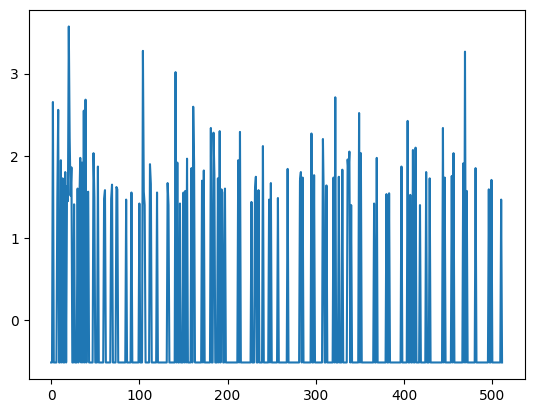

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

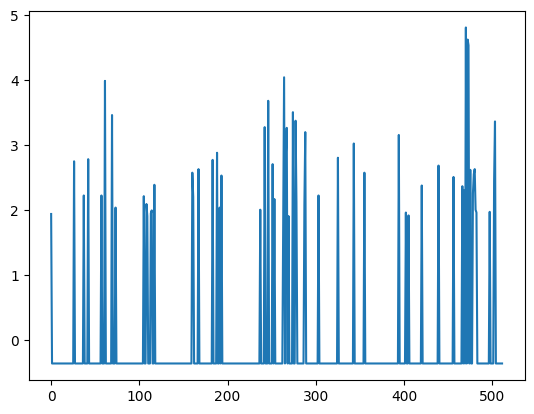

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

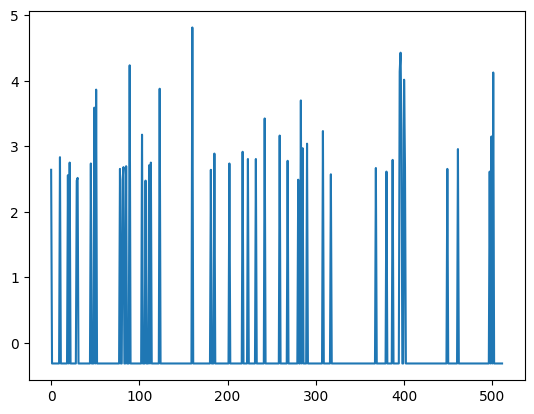

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

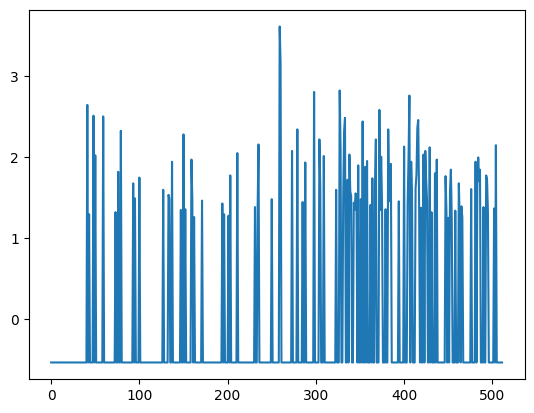

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

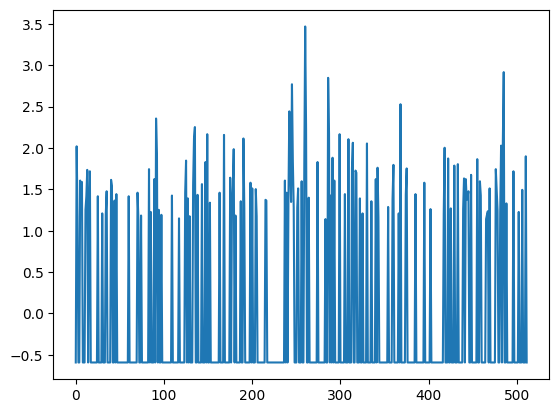

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

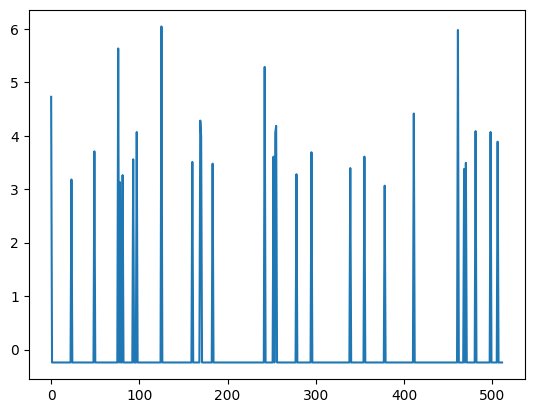

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

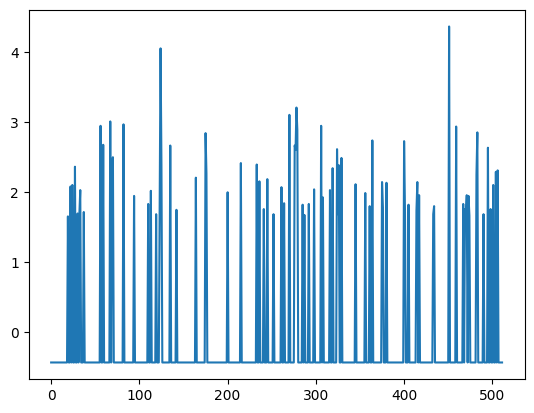

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

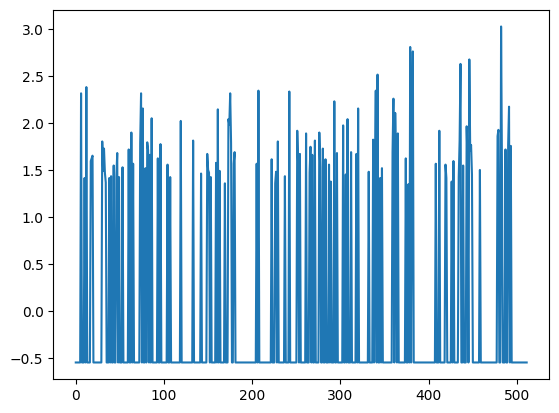

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

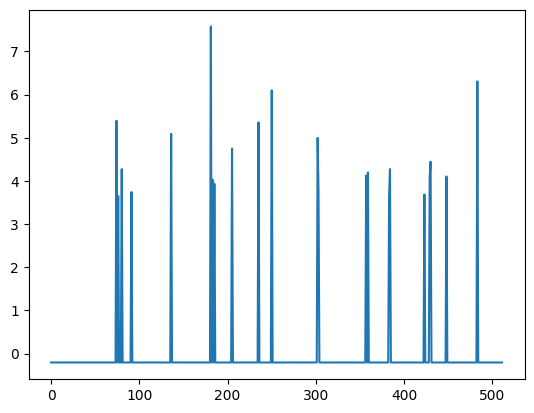

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

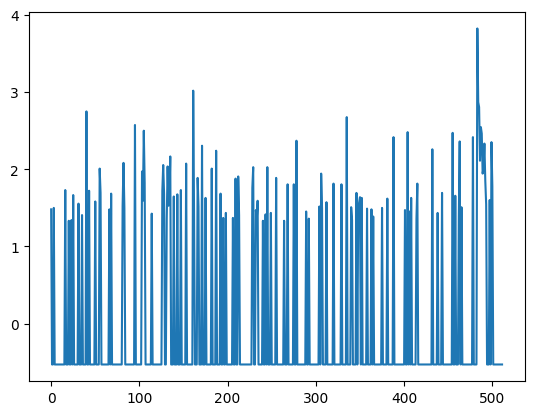

<IPython.core.display.Javascript object>

In [66]:
tb = widgets.TabBar([f"Instance {i+1}" for i in range(10)], location='top')

for i in range(10):
  with tb.output_to(i):
    pd.Series(train_data[i]).plot()


(c) Módosítsa a TabBar-on való megjelenítés kódját úgy, hogy egy-egy idősort kékkel vagy pirossal jelenít meg az idősor osztálycímkéjének megfelelően!

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

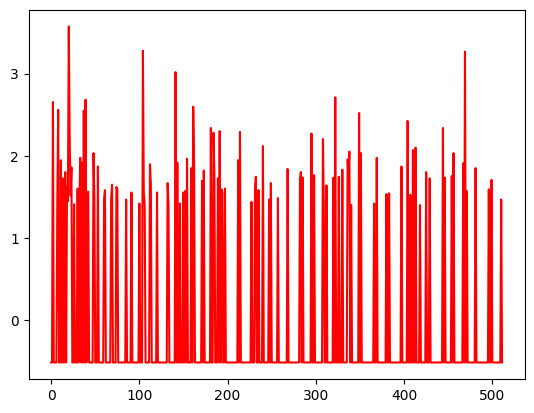

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

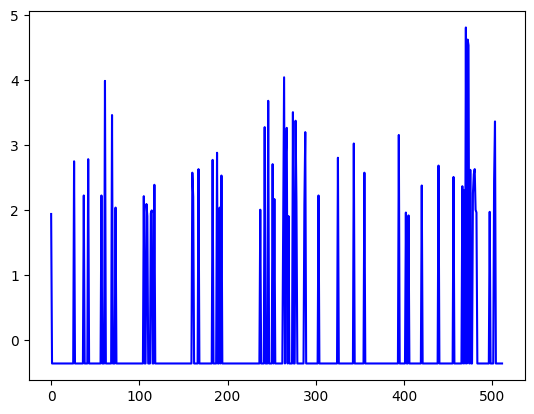

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

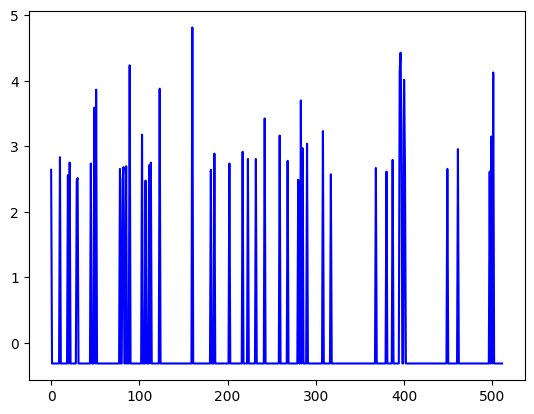

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

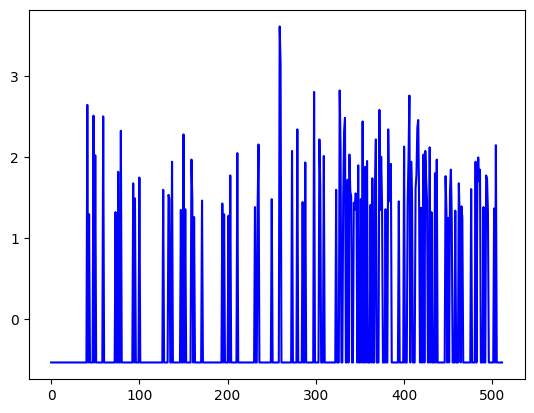

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

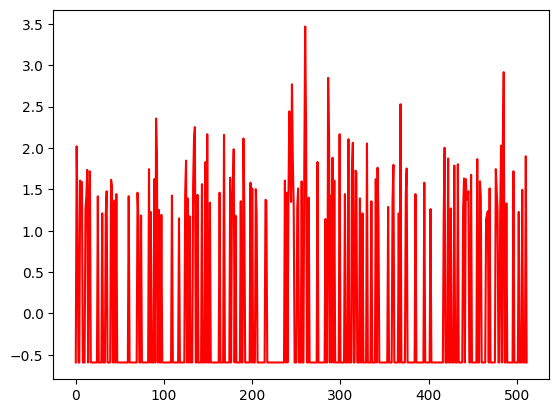

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

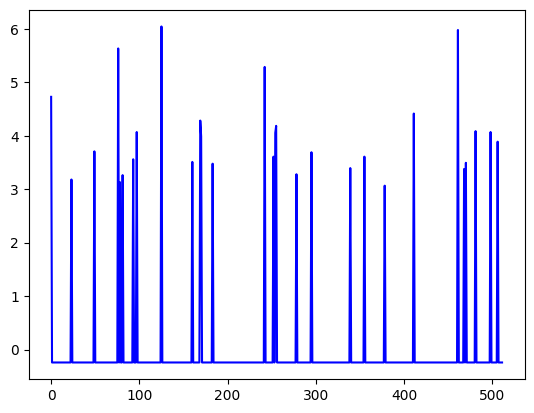

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

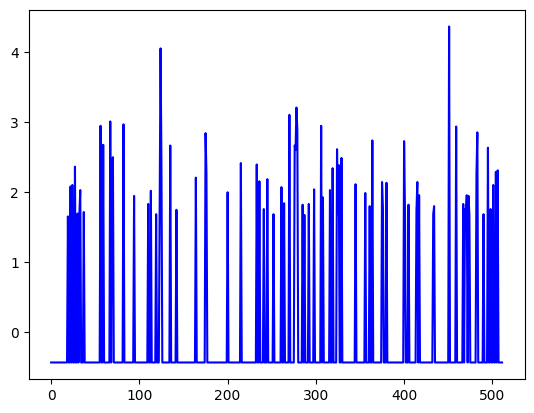

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

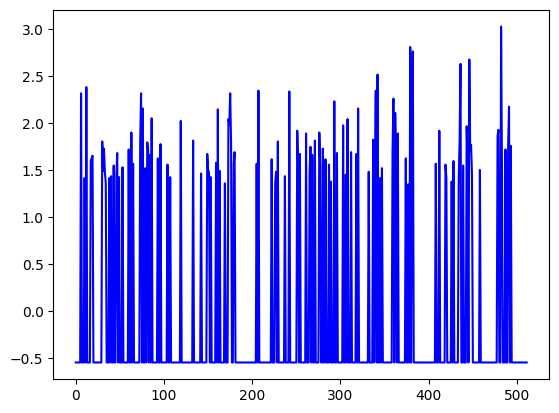

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

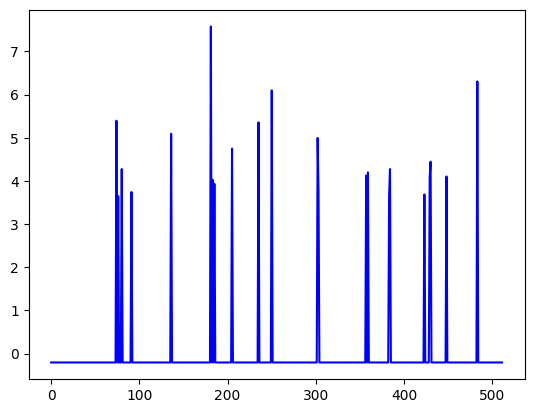

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

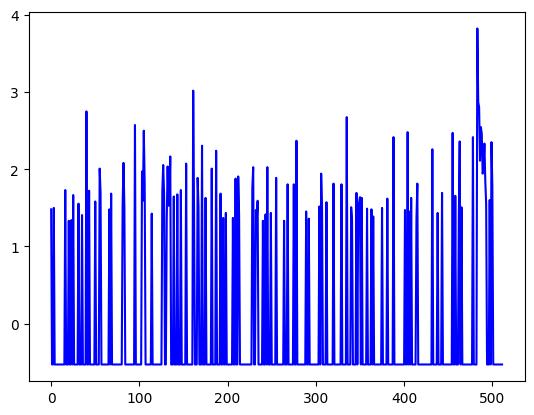

<IPython.core.display.Javascript object>

In [68]:
tb = widgets.TabBar([f"Instance {i+1}" for i in range(10)], location='top')

for i in range(10):
  with tb.output_to(i):
    color = 'blue' if train_labels[i] == 0 else 'red'  # Assign blue for class 0, red for others
    pd.Series(train_data[i]).plot(color=color)


**9. feladat: Legközelebbi szomszéd osztályozás euklideszi távolsággal**

(a) Osztályozza az idősorokat legközelebbi szomszéd osztályozóval az euklideszi távolság használatával és értékelje ki az osztályozó pontosságát!

(b) Írjon egy függvényt, amely a Piecewise Aggregate Approximation (PAA) transzformációt valósítja meg!

(c) Transzformálja az idősorokat PAA-val, 4-es ablakmérettel! Osztályozza a transzformált idősorokat és hasonlítsa össze az osztályozás pontosságát az (a) feladatbeli osztályozás pontosságával!

In [75]:
def nearest_neighbor_prediction_for_an_instance_time_series(test_instance: np.array,
                                                            train_data: np.array,
                                                            train_labels: np.array,
                                                            distance_func=euclidean_distance) -> int:
    nearest_neighbor_index, _ = get_nearest_neighbor(test_instance, train_data, distance_func)
    return train_labels[nearest_neighbor_index]

def nearest_neighbor_predictions_time_series(test_data: np.array,
                                             train_data: np.array,
                                             train_labels: np.array,
                                             distance_func=euclidean_distance) -> np.array:
    return np.array([nearest_neighbor_prediction_for_an_instance_time_series(test_instance, train_data, train_labels, distance_func) for test_instance in test_data])

def classification_accuracy_time_series(train_data, train_labels, test_data, test_labels):
    predictions = nearest_neighbor_predictions_time_series(test_data, train_data, train_labels)
    accuracy = np.sum(predictions == test_labels) / len(test_labels)
    return accuracy

accuracy = classification_accuracy_time_series(train_data, train_labels, test_data, test_labels)
print(f"Accuracy of the nearest neighbor classifier on the earthquake dataset: {accuracy}")


Accuracy of the nearest neighbor classifier on the earthquake dataset: 0.7122302158273381


In [78]:
def paa(time_series: np.array, window_size: int) -> np.array:
  paa_series = np.zeros(len(time_series)//window_size)
  for i in range(len(paa_series)):
    paa_series[i] = np.mean(time_series[i*window_size:(i+1)*window_size])
  return paa_series

In [79]:
# Test
paa([1,2,3,2,8,9,10,11],4)==np.array([2,9.5])

array([ True,  True])

In [80]:
# PAA transzformáció az összes idősorra
window_size = 4
train_data_paa = np.array([paa(ts, window_size) for ts in train_data])
test_data_paa = np.array([paa(ts, window_size) for ts in test_data])

# Osztályozás a PAA transzformált idősorokkal
accuracy_paa = classification_accuracy_time_series(train_data_paa, train_labels, test_data_paa, test_labels)

print(f"Accuracy with PAA (window size = {window_size}): {accuracy_paa}")

# Eredmények összehasonlítása
print(f"Accuracy without PAA: {accuracy}")


Accuracy with PAA (window size = 4): 0.7122302158273381
Accuracy without PAA: 0.7122302158273381


**10. feladat: Dynamic Time Warping**

(a) Írjon egy függvényt, amely két idősor dynamic time warpin (DTW) távolságát számolja!

(b) Használja a függvényt legközelebbi szomszéd osztályozóban a földrengésadatok osztályozásásra! Mérje le, hogy mennyi ideig tart és milyen pontos az osztályozás!

In [94]:
def dtw(ts1: np.array, ts2: np.array) -> float:
  """
  Dynamic Time Warping távolság kiszámítása

  Bemenet:
  --------
    ts1 : np.array
      Az első idősor
    ts2 : np.array
      A második idősor

  Kimenet:
    dtw : float
      A két idősor távolsága
  """
  n, m = len(ts1), len(ts2)
  cost = np.zeros((n+1, m+1))
  cost[0, 1:] = np.inf
  cost[1:, 0] = np.inf
  for i in range(1, n+1):
    for j in range(1, m+1):
      cost[i, j] = abs(ts1[i-1] - ts2[j-1])

  for i in range(1, n+1):
    for j in range(1, m+1):
      cost[i, j] += min(cost[i-1, j], cost[i, j-1], cost[i-1, j-1])

  return cost[n, m]

In [95]:
# Test
dtw([1,2,3,3,4,1],[1,1,3,4,3,1]) == 2

np.True_

In [96]:
def nearest_neighbor_dtw(train_data, train_labels, test_data):
    """
    Nearest Neighbor classifier using DTW distance.

    Parameters:
    train_data : np.array - Training time series data
    train_labels : np.array - Labels of training data
    test_data : np.array - Testing time series data

    Returns:
    list - Predicted labels for the test data
    """
    predictions = []

    for test_instance in test_data:
        distances = [dtw(test_instance, train_instance) for train_instance in train_data]
        nearest_index = np.argmin(distances)  # Index of nearest neighbor
        predictions.append(train_labels[nearest_index])  # Assign its label

    return predictions

In [ ]:
# Load Earthquake dataset
train_data_with_labels = np.genfromtxt('Earthquakes_TRAIN.txt')
test_data_with_labels = np.genfromtxt('Earthquakes_TEST.txt')

train_data = train_data_with_labels[:, 1:]  # Exclude labels
train_labels = train_data_with_labels[:, 0]  # Labels
test_data = test_data_with_labels[:, 1:]
test_labels = test_data_with_labels[:, 0]

# Measure classification time
start_time = time.time()
predictions = nearest_neighbor_dtw(train_data, train_labels, test_data)
end_time = time.time()

# Compute accuracy
accuracy = accuracy_score(test_labels, predictions)

# Print results
print(f"Classification accuracy: {accuracy * 100:.2f}%")
print(f"Time taken: {end_time - start_time:.2f} seconds")
